<a href="https://colab.research.google.com/github/teeloren/CC-Project/blob/main/Final_Project_Farmers_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Question: Are NYS Farmers Markets serving the communities most in need?

# Farmers Market Dataset
    # Source: https://data.ny.gov/Economic-Development/Farmers-Markets-in-New-York-State/qq4h-8p86
    # Data File Layout: https://data.ny.gov/api/assets/E62C8927-62E5-4D23-A03B-BF9AB1BA006D?download=true
    # Data File Summary: https://data.ny.gov/api/assets/52CA6FF7-C560-4635-8B6A-4196A9F1BF93?download=true
  
# Small Area Income and Poverty Estimates (SAIPE) Dataset (County)
    # Source: https://www.census.gov/data-tools/demo/saipe/#/?map_geoSelector=aa_c&s_state=36&s_year=2020

# Labor Market Regions of NY Dataset
    # Source: https://data.ny.gov/Economic-Development/Labor-Market-Regions/imem-myat

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##### DATASETS #####

# Farmers Market [Shape:(579, 20)]
dfmarket = pd.read_csv('https://raw.githubusercontent.com/teeloren/CC-Project/main/Farmers__Markets_in_New_York_State%20(1).csv')
dfmarket.shape
dfmarket.info()
dfmarket

# County Economic [Shape:(64, 44)]
dfcounty = pd.read_csv('https://raw.githubusercontent.com/teeloren/CC-Project/main/SAIPESNC_16MAY22_16_32_58_86.csv')
dfcounty.shape
dfcounty.info()
dfcounty
# Regions [Shape:(62,2)]
dfreg = pd.read_csv('https://raw.githubusercontent.com/teeloren/CC-Project/main/Labor_Market_Regions.csv')
dfreg.shape
dfreg.info()
dfreg

In [4]:
##### CLEANING Farmers Market DATASET ######

# Any duplicate values?
dfmarket.duplicated().any() #False

# Any null values?
dfmarket.isnull().values.any()  #True
dfmarket.isnull().sum() #2 cols (Market Link: 146)(Operation Season 1)

# Cleaning null data found in Market Link and Operation Season columns
# dfmarket = dfmarket.drop(['Market Link'], axis=1) # dropped Market Link column, not needed for charting 

# View null rows
nullrows = dfmarket[dfmarket['Operation Season'].isna()]

# Mode for the null column
dfmode =dfmarket['Operation Season'].mode()

# Filling null value with column mode
dfmarket.fillna(dfmarket['Operation Season'].mode()[0], inplace=True)

# Second check - Any null values?
dfmarket.isnull().values.any() # now False, replaced with column mode

# Dropping columns not needed for analysis
# dfmarket = dfmarket.drop(['Market Location', 'Address Line 1', 'State','Contact', 'Phone', 'Latitude', 'Longitude', 'Georeference'], axis=1)

False

In [24]:
dfcounty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 2 to 63
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   County                   62 non-null     object 
 1   Poverty Universe         62 non-null     float64
 2   Number in Poverty        62 non-null     float64
 3   Median Household Income  62 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
##### CLEANING County DATASET #####

# Limiting dataset to only columns needed for analysis
dfcounty_data = dfcounty[['State / County Name','All Ages SAIPE Poverty Universe','All Ages in Poverty Count', 'Median Household Income in Dollars']]

# Only reviewing counties, removing rows with data for US and NYS
dfcounty_data = dfcounty_data.drop(index=0)
dfcounty_data = dfcounty_data.drop(index=1)
      ## dropped data 
          # County	Poverty Universe	Number in Poverty	Median Household Income
            # 0	United States	321478113.0	38371394.0	67340
            # 1	New York	18840599.0	2401141.0	73354
# Any duplicate values?
dfcounty_data.duplicated().any() #False

# Any null values?
dfcounty_data.isnull().values.any() #False

# Changing column Names
dfcounty_data.rename(columns = {'State / County Name':'County', 'All Ages SAIPE Poverty Universe':'Poverty Universe', 'All Ages in Poverty Count':'Number in Poverty', 'Median Household Income in Dollars':'Median Household Income'}, inplace = True)

#reformat Median Household Income, Poverty Universe and Number in Poverty columns to int values
dfcounty_data["Median Household Income"] = dfcounty_data["Median Household Income"].str.replace("$","")
dfcounty_data["Median Household Income"] = dfcounty_data["Median Household Income"].str.replace(",","")
dfcounty_data['Median Household Income'] = dfcounty_data['Median Household Income'].astype(int)

dfcounty_data["Number in Poverty"] = dfcounty_data["Number in Poverty"].str.replace(",","")
dfcounty_data['Number in Poverty'] = dfcounty_data['Number in Poverty'].astype(float)

dfcounty_data["Poverty Universe"] = dfcounty_data["Poverty Universe"].str.replace(",","")
dfcounty_data['Poverty Universe'] = dfcounty_data['Poverty Universe'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


In [6]:
##### PREPARE DATASETS FOR MERGE w/FARMERS MARKET DATASET #####

# Farmers Market total by County
dfmarket_data = dfmarket.County.value_counts()

# Convert county to a dataframe
dfm = pd.DataFrame(dfmarket_data)

# Reset index so county name can be a column
dfm = dfm.reset_index()

# Rename columns
dfm.rename(columns = {'index':'County', 'County':'Farmers Market Count'}, inplace = True)

# Reformat County column by adding "County(NY)" to all values
dfm['County'] = dfm['County'].astype(str) + ' County (NY)'

In [7]:
##### CLEANING Regions Dataset  #####

# Reformat County column by adding "County(NY)" to all values
dfreg['County'] = dfreg['County'].astype(str) + ' County (NY)'

In [8]:
##### MERGING Farmers Markerts and County DATASETS #####

dfmerge = dfm.merge(dfcounty_data, left_on='County', right_on='County', how='outer')
    
dfreg_markets = dfreg.merge(dfmerge, left_on='County', right_on='County', how='outer')
    # Shape: (62, 7)

In [9]:
##### CLEANING Merged DATASETS #####

# Any null values?
dfreg_markets.isnull().values.any() #True 

# Column name with null values
dfreg_markets.isnull().sum() # 1 null value, Farmers Market Count 

# Any duplicate values?
dfreg_markets.duplicated().any() # False

# Replace null values with 0 (missing data for # of Farmers Market, wasnt in Farmers Market dataset)
dfreg_markets.fillna(0, inplace = True)

# Reformat Farmers Market Count column to int values
dfreg_markets['Farmers Market Count'] = dfreg_markets['Farmers Market Count'].astype('int')


In [10]:
nys_pop = dfreg_markets['Poverty Universe'].sum()
fm_total = dfreg_markets['Farmers Market Count'].sum()

dfreg_markets['Percent of Pop'] = (((dfreg_markets['Number in Poverty']/nys_pop)*100)/12.7)*100
dfreg_markets['Percent of Farmers Market'] = (dfreg_markets['Farmers Market Count']/fm_total)*100


regions = dfreg_markets.copy()
# regions = regions.drop(['County', 'Percent in Poverty', 'Percent in Poverty(NYS)'], axis=1)


nyregions = regions.groupby(regions.Region).sum()
nyregions = nyregions.reset_index()
nyregions = nyregions.sort_values(by='Farmers Market Count')


In [11]:
##### Statistical Table #####

# Numerical columns for stats table
stats = dfreg_markets[['Farmers Market Count', 'Poverty Universe','Number in Poverty', 'Median Household Income']]

# Mean, median, max and min of the columns in the stats list
mean = stats.mean().round(1)
median = stats.median()
max = stats.max()
min = stats.min()

# Merge column stats into a table
stats_table = pd.concat([mean,median, min, max], axis=1)

# Renaming table columns
stats_table.rename(columns = {0:"Mean",1:"Median", 2:"Min", 3:"Max"}, inplace = True)
stats_table

,Mean,Median,Min,Max
Farmers Market Count,9.3,7.0,0.0,46.0
Poverty Universe,303880.6,83676.0,4334.0,2513387.0
Number in Poverty,38728.1,9376.5,378.0,446856.0
Median Household Income,65210.2,60028.0,44906.0,122730.0


In [12]:
## Frequency of Categorical values (NYS Region - # of Counties)

reg_cat = dfreg_markets.Region.value_counts()
counties_per_region = pd.DataFrame(reg_cat)
counties_per_region

,Region
Finger Lakes,9
Capital Region,8
Southern Tier,8
Hudson Valley,7
North Country,7
Mohawk Valley,6
Central New York,5
New York City,5
Western New York,5
Long Island,2


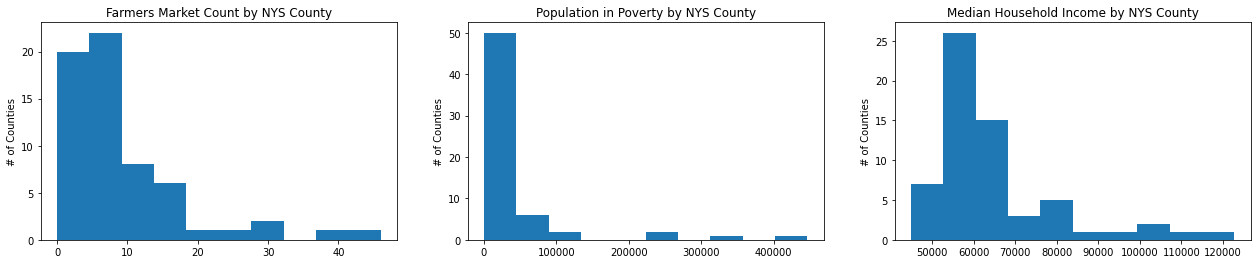

In [13]:
##### OUTLIERS #####

dfreg_markets[['Region', 'County', 'Farmers Market Count', 'Poverty Universe',
       'Number in Poverty', 'Median Household Income', 'Percent of Pop',
       'Percent of Farmers Market']]

# Boxplot to illustrate outliers
fig, (axs1,axs2, axs3) = plt.subplots(1,3, figsize=(6,4))

axs1.hist(dfreg_markets['Farmers Market Count'])
axs1.set_title('Farmers Market Count by NYS County')
axs1.set_ylabel('# of Counties')

axs2.hist(dfreg_markets['Number in Poverty'])
axs2.set_title('Population in Poverty by NYS County')
axs2.set_ylabel('# of Counties')


axs3.hist(dfreg_markets['Median Household Income'])
axs3.set_title('Median Household Income by NYS County')
axs3.set_ylabel('# of Counties')


plt.subplots_adjust(left=-1.9)
plt.show()

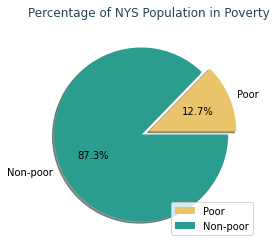

In [14]:
##### Percentage of NYS Population in Poverty #####

pov_uni = dfreg_markets["Poverty Universe"].sum()
poor = dfreg_markets["Number in Poverty"].sum()
non_poor = pov_uni - poor

nys_pop = [poor,non_poor]
pop_labels = 'Poor', "Non-poor"
explode = (0,0.1)


plt.pie(nys_pop,labels=pop_labels, autopct='%1.1f%%' , explode=explode, shadow=True, colors=['#e9c46a','#2a9d8f'])
plt.title('Percentage of NYS Population in Poverty', color='#264653')
plt.legend(loc='lower right')
plt.show()

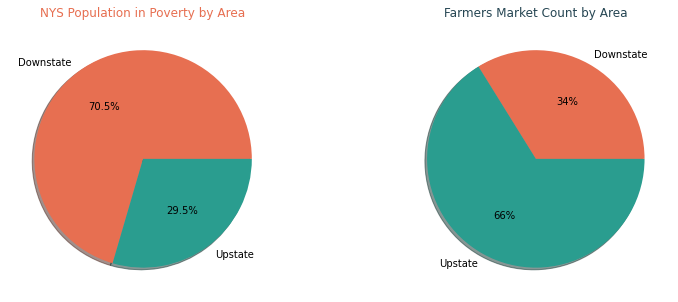

In [16]:
##### Breakdown of NYS Population in Poverty by Area #####

downstate = nyregions[(nyregions.Region == "New York City") | (nyregions.Region == "Long Island") | (nyregions.Region == "Hudson Valley")]
upstate = nyregions[(nyregions.Region == "Southern Tier") | (nyregions.Region == "Mohawk Valley") 
          | (nyregions.Region == "Central New York") | (nyregions.Region == "North Country")
          | (nyregions.Region == "Finger Lakes")| (nyregions.Region == "Western New York")| (nyregions.Region == "Capital Region")]

# create double pie chart for upstate/downstate data

# chart labels
area_labels = 'Downstate','Upstate'

## Poverty Universe by area
downstate_pop = downstate['Poverty Universe'].sum()
upstate_pop = upstate['Poverty Universe'].sum()
      # variables for chart
area_pop = [downstate_pop,upstate_pop]

## Number in Poverty by area
downstate_nys_poor = downstate['Number in Poverty'].sum()
upstate_nys_poor = upstate['Number in Poverty'].sum()
      # variables for chart
area_poor = [downstate_nys_poor,upstate_nys_poor]

## Percent of Farmers Market by area
downstate_fm = downstate['Percent of Farmers Market'].sum()
upstate_fm = upstate['Percent of Farmers Market'].sum()
      # variables for chart
area_fm = [downstate_fm,upstate_fm]


## number in poverty and farmers markets count by area
fig, (axs1,axs2) = plt.subplots(1,2, figsize=(10,5))

axs1.pie(area_poor, labels=area_labels, autopct='%1.1f%%', shadow=True, colors=['#e76f51','#2a9d8f'])
axs1.set_title('NYS Population in Poverty by Area', color='#e76f51')

axs2.pie(area_fm, labels=area_labels, autopct='%.0f%%', shadow=True, colors=['#e76f51','#2a9d8f'])
axs2.set_title('Farmers Market Count by Area', color='#264653')

plt.subplots_adjust(left=-.1)
plt.show()



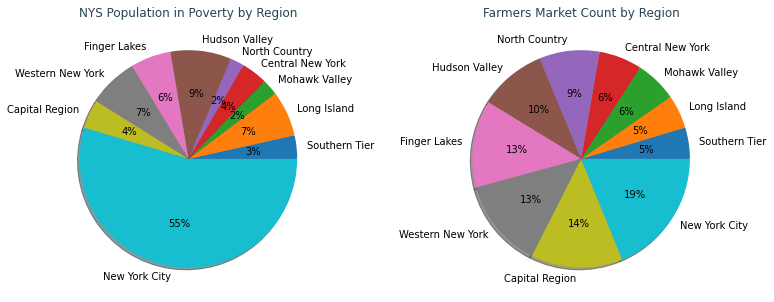

In [17]:
## number in poverty and farmers markets count by region
fig, (axs3, axs4) = plt.subplots(1,2, figsize=(10,5))

axs3.pie(nyregions['Number in Poverty'], labels=nyregions['Region'], autopct='%.0f%%', shadow=True)
axs3.set_title('NYS Population in Poverty by Region', color='#264653')

axs4.pie(nyregions['Farmers Market Count'], labels=nyregions['Region'], autopct='%.0f%%', shadow=True)
axs4.set_title('Farmers Market Count by Region', color='#264653')

plt.subplots_adjust(left=-.1)

plt.show()

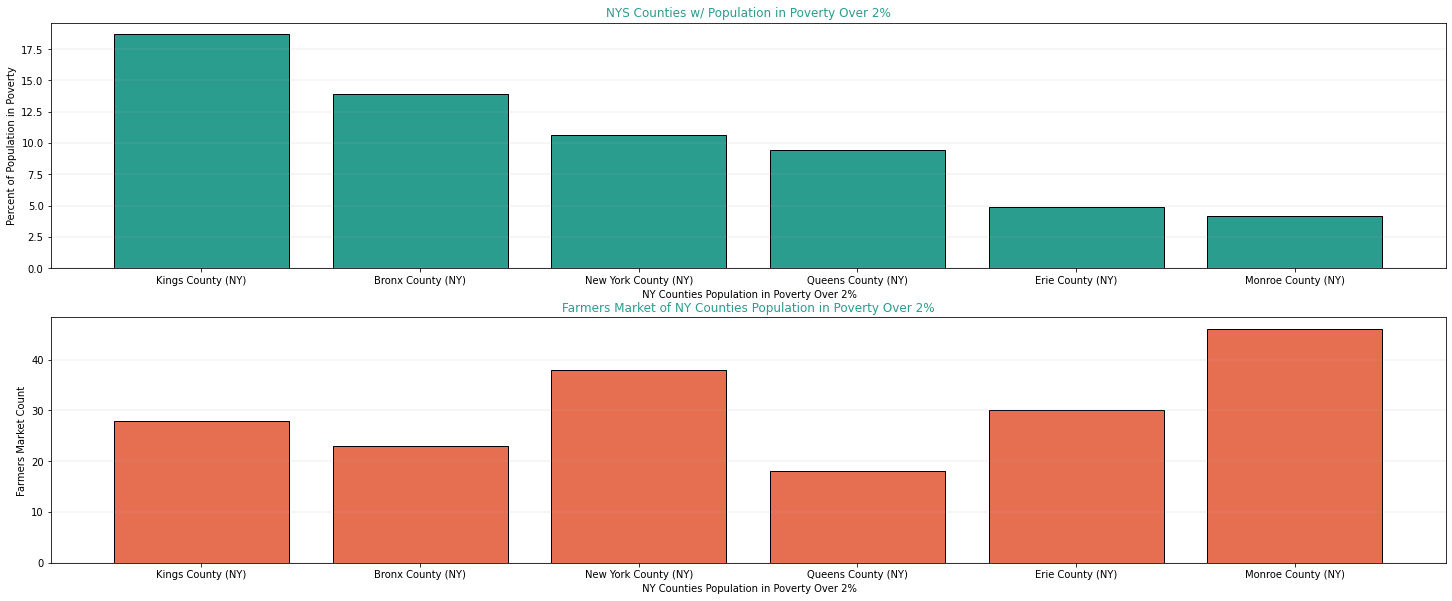

In [25]:
##### County w/most population in poverty (10% of counties)
dfreg_markets = dfreg_markets.sort_values(by='Percent of Pop', ascending=False)

fig, (axs1,axs2) = plt.subplots(2,1, figsize=(25,3))

axs1.bar(dfreg_markets['County'].head(6),dfreg_markets['Percent of Pop'].head(6), color='#2a9d8f',edgecolor='k')
axs1.set_title('NYS Counties w/ Population in Poverty Over 2%',color='#2a9d8f')
axs1.set_xlabel(' NY Counties Population in Poverty Over 2%')
axs1.set_ylabel('Percent of Population in Poverty')
axs1.grid(axis='y', lw=.2)

axs2.bar(dfreg_markets['County'].head(6),dfreg_markets['Farmers Market Count'].head(6), color='#e76f51',edgecolor='k')
axs2.set_title('Farmers Market of NY Counties Population in Poverty Over 2%', color='#2a9d8f')
axs2.set_xlabel(' NY Counties Population in Poverty Over 2%')
axs2.set_ylabel('Farmers Market Count')
axs2.grid(axis='y', lw=.2)


plt.subplots_adjust(top=2.2, bottom=-.3)

plt.show()

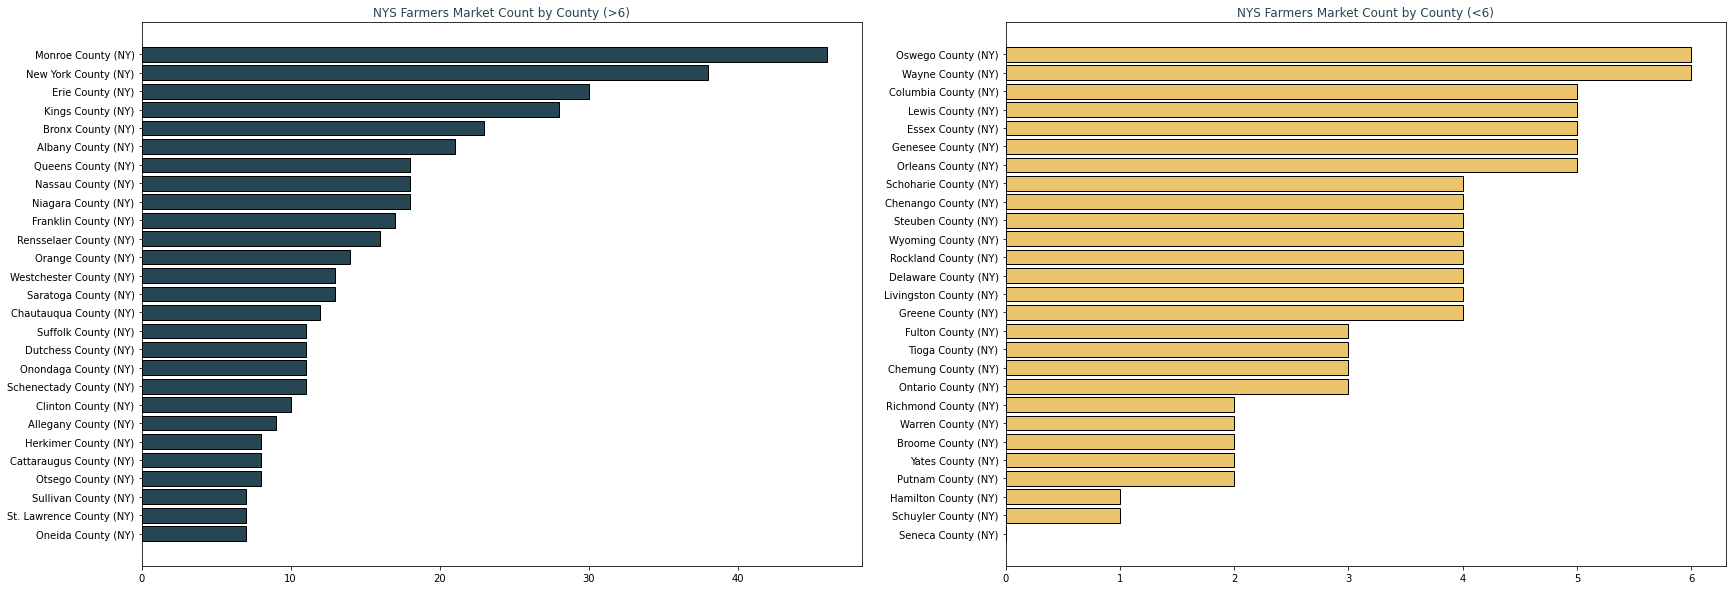

In [18]:
### Farmers Markets per County
dfreg_markets = dfreg_markets.sort_values(by='Farmers Market Count')
fig, (axs1,axs2) = plt.subplots(1,2,figsize=(5,10))

axs2.barh(dfreg_markets['County'].head(27),dfreg_markets['Farmers Market Count'].head(27), color='#e9c46a',edgecolor='k')
axs2.set_title('NYS Poverty Universe by area', color='#264653')
axs2.set_title('NYS Farmers Market Count by County (<6)')

axs1.barh(dfreg_markets['County'].tail(27),dfreg_markets['Farmers Market Count'].tail(27), color='#264653',edgecolor='k')
axs1.set_title('Percent of NYS Population in Poverty by area', color='#264653')
axs1.set_title('NYS Farmers Market Count by County (>6)')

plt.subplots_adjust(left=-3.5)

plt.show()


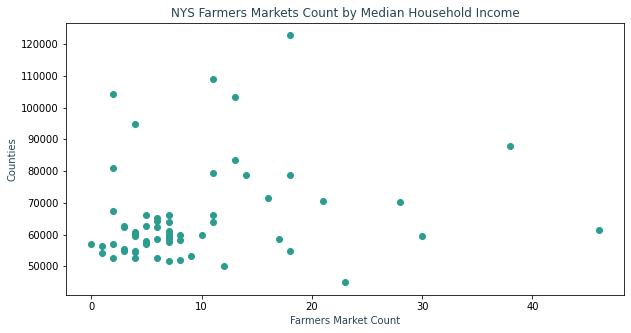

In [15]:
### Farmers Market Count by Median Household Income
dfreg_markets = dfreg_markets.sort_values(by='Farmers Market Count')
plt.figure(figsize=(10,5))
plt.scatter(dfreg_markets['Farmers Market Count'],dfreg_markets['Median Household Income'], color="#2a9d8f")
plt.xlabel('Farmers Market Count',color='#264653' )
plt.ylabel('Counties', color='#264653')
plt.title('NYS Farmers Markets Count by Median Household Income', color='#264653')
plt.show()

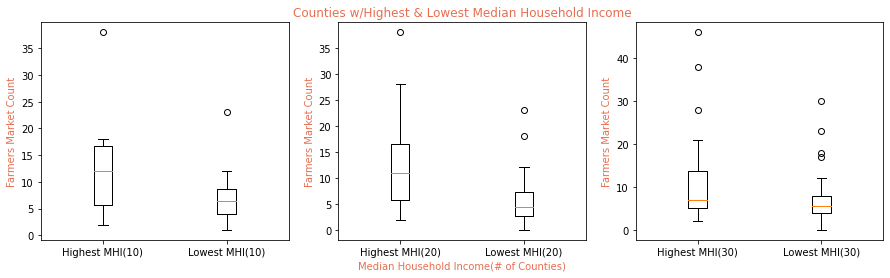

In [20]:
dfreg_markets = dfreg_markets.sort_values(by='Median Household Income', ascending=False)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(3,4))


# labels
l10 = ['Highest MHI(10)', 'Lowest MHI(10)']
ax1.set_ylabel('Farmers Market Count', color='#e76f51')

# Counties w/10 highest median household income, farmers market count
h10 = dfreg_markets['Farmers Market Count'].head(10)
t10 = dfreg_markets['Farmers Market Count'].tail(10)
fm = [h10,t10]
bp = ax1.boxplot(fm, labels=l10)

# labels
l20 = ['Highest MHI(20)', 'Lowest MHI(20)']
ax2.set_ylabel('Farmers Market Count', color='#e76f51')
ax2.set_xlabel('Median Household Income(# of Counties)', color='#e76f51')
ax2.set_title('Counties w/Highest & Lowest Median Household Income', color='#e76f51')

# Counties w/20 highest median household income, farmers market count
h20 = dfreg_markets['Farmers Market Count'].head(20)
t20 = dfreg_markets['Farmers Market Count'].tail(20)
fm = [h20,t20]
bp = ax2.boxplot(fm, labels=l20)

# labels
l30 = ['Highest MHI(30)', 'Lowest MHI(30)']
ax3.set_ylabel('Farmers Market Count', color='#e76f51')

# Counties w/30 highest median household income, farmers market count
h30 = dfreg_markets['Farmers Market Count'].head(30)
t30 = dfreg_markets['Farmers Market Count'].tail(30)
fm = [h30,t30]
bp = ax3.boxplot(fm, labels=l30)


plt.subplots_adjust(left=-3)
plt.show()



In [21]:
## Color Palette: orange: e76f51, light orange: f4a261, old yellow: e9c46a, green/blue: 2a9d8f, dark bluish: 264653 (Source: coolors.co)